# How does Facial Recognition work?
<h2></h2>
<center><img src="./notebook_images/kyle-glenn-MbPDSi0ILMo-unsplash.jpg" alt="FacePicture" style="width: 60%;"/></center>

Photo by Kyle Glenn on Unsplash

<a style="background-color:black;color:white;text-decoration:none;padding:4px 6px;font-family:-apple-system, BlinkMacSystemFont, &quot;San Francisco&quot;, &quot;Helvetica Neue&quot;, Helvetica, Ubuntu, Roboto, Noto, &quot;Segoe UI&quot;, Arial, sans-serif;font-size:12px;font-weight:bold;line-height:1.2;display:inline-block;border-radius:3px" href="https://unsplash.com/@kylejglenn?utm_medium=referral&amp;utm_campaign=photographer-credit&amp;utm_content=creditBadge" target="_blank" rel="noopener noreferrer" title="Download free do whatever you want high-resolution photos from Kyle Glenn"><span style="display:inline-block;padding:2px 3px"><svg xmlns="http://www.w3.org/2000/svg" style="height:12px;width:auto;position:relative;vertical-align:middle;top:-2px;fill:white" viewBox="0 0 32 32"><title>unsplash-logo</title><path d="M10 9V0h12v9H10zm12 5h10v18H0V14h10v9h12v-9z"></path></svg></span><span style="display:inline-block;padding:2px 3px">Kyle Glenn</span></a>

Everyone's face is different, and yet they are all roughly the same.

It is easy for humans, and even animals, to recognize faces but how would you instruct a computer to do the same?

<font size="4">That is the question we are going to answer in this notebook.</font>

## Overview

<center><img src="./notebook_images/BigNineCover-193x300.jpg" alt="FacePicture" style="width: 25%;"/></center>

Amy Webb - author of *The Big Nine* talks about the 9 global companies that are responsible for the majority of the AI research being done today.  The US has 6, which Amy calls the *g-mafia*, and they are:

* Google
* Microsoft
* Amazon
* IBM
* Apple
* Facebook

and 3 in China called the BAT:

* Baidu
* Alibaba
* Tencent

Amy Webb points out that these companies, and the countries and governments these companies operate in are shaping the future of the world we live in.  

One aspect of that shaping is facial recognition.


### Controversy of Facial Recognition

<div style="height: 20px"></div>
    
<center><font size="5">Who owns your face? </font></center>

This exact question was asked in an [ACM article](https://cacm.acm.org/news/237592-who-owns-your-face/fulltext) and there is no good answer right now.  We give away our most recognizable attribute every day on social media platforms. Digital representations of our faces are being collected, bought, sold and stored because there are no real restrictions on it.   

[My Medium article](https://towardsdatascience.com/using-linkedin-profile-pictures-for-facial-recognition-8be709e8fac) shows on how to perform facial recognition on a single LinkedIn Profile picture.

<div style="height: 20px"></div>
    
<center><font size="5">Social Credit Scoring System </font></center>

Today China is working toward a 'Social Credit Scoring System' as reference by Amy Webb and others:

* See *The Big Nine*

* https://www.cbc.ca/radio/thecurrent/the-current-for-march-7-2019-1.5046443/how-china-s-social-credit-system-blocked-millions-of-people-from-travelling-1.5046445

* https://www.wired.com/story/china-social-credit-score-system/

According to the official Chinese blueprint is states:

"... it will ‘allow the trustworthy to roam everywhere under heaven while making it hard for the discredited to take a single step. ..."

To do this China is using Facial Recognition, and other technologies, on a massive scale.  China is using this technology to social engineer behavior.

However, so too are the g-mafia.  Maybe not to create a social credit scoring system, but for what purpose are they using our most highly personal and highly recognizable attribute - our faces.


*The Big Nine* is a non-technical book that everyone can read and understand.  I would highly recommend this book to anyone wanting to understand the state of AI today.



The purpose of the overview is not to unnecessarily scare people - but being a little afraid concerning how for profit companies with an allegiance to shareholders and not to the country in which they do business, should be concerning.

This notebook will show how facial recognition works and demonstrate just how easy it is to train a model to recognize anyone with as a little as a single picture.

If Facial Recognition technology is so pervasive it would be in everyone's best interest to understand at least the basics of how it work.

This notebook will show code snippets of the relevant parts of the facial recognition process.  For full details see the scripts that are in the github repo backing this notebook.

## Facial Recognition Background

In 2001 Paul Viola and Michael Jones created a object detection algorithm.  Although generic its focus was on faces.  Since then, more reliable solutions have been discovered.  

In 2005 an algorithm called:  **histogram of oriented gradients** or just **HOG** for short was developed and it was much more reliable and faster.  
Since then CNN models have been trained to locate faces - with even greater accuracy but at the expense of compute time.  Using the **HOG** algorithm is a good balance between accuracy and compute effiency.  

Using a **HOG** algorithm can even be run on small computing devices such as a Raspberry PI.

Facial recognition can be broken down into the following steps:

* <font size="4">Find all faces in a picture</font>

<br>

* <font size="4">Determine 68 Facial Landmarks</font>

<br>

* <font size="4">Encode 68 Facial Landmarks into vector of 128 values</font>

<br>

* <font size="4">Compare the unique features of the new, previously unseen face - with the faces that the model has been trained on to see which of the known faces the new face is most similiar to.</font>

### Step 1: Finding all of the faces

<center><img src="./notebook_images/just_a_face.png" alt="FacePicture" style="width: 40%;"/></center>

To find faces in a picture we start by converting any color picture to black and white.  The RGB values provide no additional information.

Then, for every pixel examine the pixels immediately adjacent and find the pixel that is the darkest and 'draw' an arrow in that direction - from lightest to darkest.

Doing this for every pixel shows the flow of light intensity from light to darker.  These arrows are called gradients.  The gradients, or changes in pixel density, are a better way to analyze images because lighter or darker images are not as impacted by changes in color or brightness.  

If we looked just at pixel values a really bright or light picture would be considered different from a dark picture even if they are of the same person.  However the gradients would remain relatively the same.


Keeping track of the gradients for every single pixel is a lot of data - therefore images are generally broken up into 16x16 segments.  In each segment, the direction of the gradients are tallied and the 16x16 image segment is replaced by the most prevalent gradient.

<center><img src="./notebook_images/hog_example.png" alt="FacePicture" style="width: 100%;"/></center>

Lets look at what the resulting HOG would look like from the video camera

In [1]:
%%bash 
python video_hog.py -t 20

2021-09-25 11:38:09.708 Python[10258:837905] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)


```python
from skimage.feature import hog

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, multichannel=True)
cv2.imshow("HOG", hog_image)

```

Now - lets apply facial detection to show where the faces are detected.

The libraries *face_recognition* and *dlib* provide a programatic interface to the pre-trained models that can take a HOG and determine the area of the face.

<center><img src="./notebook_images/hog_face_example.png" alt="FacePicture" style="width: 100%;"/></center>

In [2]:
%%bash 
python video_hog_face_detect.py -t 25

2021-09-25 11:39:03.165 Python[10269:840127] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)


```python
def detect_mark_faces(frame, hog_image):
    boxes = face_recognition.face_locations(frame, model='hog')
    for (top, right, bottom, left) in boxes:
        # draw the predicted face name on the image
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

        cv2.rectangle(hog_image, (left, top), (right, bottom), (255, 255, 255), 2)

```

### Step 2: Facial Landmarks

To account for different poses of faces, we will use an algorithm called, *face landmark estimation*.  The library dlib comes with a pretrained facial landmark detector.

The idea is to come up with 68 points, called landmarks, that exist on every face.  For example the outline of the eyes, bridge of the nose, top of the chin.  We use a machine learning model to find these specific points. 

Once the algorithm knows where the landmarks are, the algorithm can determine how to transform the picture to normalize the picture so we are making similar comparisons with other face encodings.

68 Point Facial Landmarks

<center><img src="./notebook_images/facial_landmarks_68markup.jpg" alt="68Landmarks" style="width: 50%;"/></center>


<center><img src="./notebook_images/facial_landmarks.png" alt="FacePicture" style="width: 50%;"/></center>

In [3]:
%%bash 
python face_landmarks.py -t 30

2021-09-25 11:39:33.830 Python[10282:842775] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)


```python
import dlib

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
shape = predictor(gray, rect)

for (x, y) in shape:
    cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

```

### Encoding Facial Landmarks

Of the 68 facial landmark features - what are the best features and measurements to determine facial recognition?

68 landmark features are used as input to a CNN (Convolutional Neural Network), that outputs a  128 element vector.  

What do the 128 values represent?

Like many neural networks - we do not really know.  It turns out that Deep Learning Neural Networks are actually much better at determining how the interaction of the 68 landmark features should be combined than a person would be.

The process of training a CNN to output accurate face encodings from any face image requires a great deal of training data.  However, once the neural network has been trained, and the weigths are known - generating the 128 element vector for a new image is relatively fast.

<center><img src="./notebook_images/landmarks_cnn_128.png" alt="cnn" style="width: 100%;"/></center>

Lets take a look at some of the encoding values in realtime.  In this case of the 128 we will look at indexes:

* Index 0

* Index 32

* Index 64

* Index 96

* Index 127


<center><img src="./notebook_images/landmark_encoding_values.png" alt="cnn" style="width: 50%;"/></center>

In [5]:
%%bash 
python encodings_display.py -t 10

2021-09-25 11:40:25.108 Python[10297:845901] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)


```python
import face_recognition

boxes = face_recognition.face_locations(image, model='hog')
encodings = face_recognition.face_encodings(image, boxes)

```

#### Encode Facial Images

Lets take some pictures and add the encodings to the collection of existing encodings.

This dataset is from the PyImageSearch article and includes characters from Jurassic Park.

[PyImageSearch Face Recognition Article](https://www.pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/)

We will use pictures from 6 characters and a set of my pictures.  We will create encodings for every picture and label the encoding the name of the person.  After we have all of the encodings we will be ready to perform facial recognition.

<table>
<td> <img src="./notebook_images/alan_grant_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/claire_dearing_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/ellie_sattler_collage.png" alt="Drawing" style="width: 250px;"/> </td>
</tr>
    <tr>
<td> <img src="./notebook_images/ian_malcolm_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/john_hammond_collage.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./notebook_images/owen_grady_collage.png" alt="Drawing" style="width: 250px;"/> </td>
</tr>


</table>

I have included my own set of images


<center><img src="./notebook_images/pat_ryan_collage.png" alt="cnn" style="width: 50%;"/></center>

In [6]:
%%bash
tree -d images/dataset 

images/dataset
├── alan_grant
├── claire_dearing
├── ellie_sattler
├── ian_malcolm
├── john_hammond
├── owen_grady
└── pat_ryan

7 directories


In [ ]:
# %%bash
# only run this if we need recreate the base encodings
# python create_facial_encodings.py -d images/dataset -e encodings/facial_encodings.pkl -r true


### Step 4: Determining the person's identity

The last step is to determine the person in the datastore of known people who has the 'closest' measurements to the image we are testing.

For this, a simple Euclidean distance calculation can be performed.

distance(f1, f2) = $\sqrt{(f1_1-f2_1)^2 + (f1_2-f2_2)^2 + ... + (f1_{128}-f2_{128})^2}$




We take the unknown facial image encodings and compare that against the known facial image encodings by calculating a distance.  The *threshold* is a parameter that can be changed to fine tune when the distance is considered a match or not.  The default value is 0.6.  If you to reduce the threshold this will reduce the false positives. This will make it more restrictive on when it determines there is a facial match. Lower the threshold value to around 0.5.  You might need to work with this threshold to get the performance you would like.

If the distance between the two facial encodings is less than the threshold, 0.6 by default, then this is considered a match.


The facial_recognition library has the matching built in, but we could also use the *k-nearest neighbors* classifier from scikit learn.

Using a picture that has never been encoded, lets calculate the distance from all of the faces that have been encoded.

<center><img src="./images/pat_ryan_linkedin/pat.ryan.smaller.png" alt="PRLinkedIn" style="width: 25%;"/></center>

In [7]:
%%bash
python calculate_encoding_distance.py -i images/pat_ryan_linkedin/pat.ryan.smaller.png -e encodings/facial_encodings.pkl

(0.32661354282556054, 'pat_ryan')
(0.3396320380221242, 'pat_ryan')
(0.37282213715155005, 'pat_ryan')
(0.3873396941553151, 'pat_ryan')
(0.3931766472928196, 'pat_ryan')
(0.39550867208939877, 'pat_ryan')
(0.4046523844511506, 'pat_ryan')
(0.40950235763100534, 'pat_ryan')
(0.41354160490816366, 'pat_ryan')
(0.41416512717769977, 'pat_ryan')
(0.4285352991745805, 'pat_ryan')
(0.4396553971704904, 'pat_ryan')
(0.44511289292837664, 'pat_ryan')
(0.4516888372607261, 'pat_ryan')
(0.4582808748855473, 'pat_ryan')
(0.47817264865584863, 'pat_ryan')
(0.5072786967667339, 'pat_ryan')
(0.5260529562656461, 'pat_ryan')
(0.5267452089307003, 'pat_ryan')
(0.5373723124691484, 'pat_ryan')
(0.5558160607623518, 'pat_ryan')
(0.5688919798438286, 'pat_ryan')
(0.5762997434396107, 'pat_ryan')
(0.5899434975941679, 'john_hammond')
(0.5915515133378403, 'pat_ryan')
(0.5931512383511677, 'pat_ryan')
(0.5942929020745742, 'pat_ryan')
(0.6014384591381164, 'pat_ryan')
(0.6066298357006913, 'pat_ryan')
(0.6181329489347294, 'john_hamm

```python

from face_recognition.api import face_distance

distance_results = face_distance(encodings, new_encoded_image)
```

Now lets try with real time video feed

In [8]:
%%bash
python video_facial_recognition.py -e encodings/facial_encodings.pkl --distance-tolerance 0.5

[INFO] loading encodings...
[INFO] starting video stream...


2021-09-25 11:40:47.297 Python[10308:847303] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)


## Photo Booth

<center><img src="./notebook_images/photo_booth.jpg" alt="PRLinkedIn" style="width: 75%;"/></center>

Lets have someone come up and we can capture new pictures, calcuate the encodings and perform facial recognition.

### Capture New Facial Images

In [9]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [11]:
%%bash
python capture_webcam_face_images.py -d images/dataset -n ernest_t_bass -c 10

Grab image: 0
Grab image: 1
Grab image: 2
Grab image: 3
Grab image: 4
Grab image: 5
Grab image: 6
Grab image: 7
Grab image: 8
Grab image: 9


2021-09-25 11:41:05.542 Python[10314:848716] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)


### Save a single image

Find a single photo of someone and place that into the 'input_images' directory. 

Then we will generate a number of training images from that single image

Input Images
keith_emerson.jpg
dave_cameron.jpg


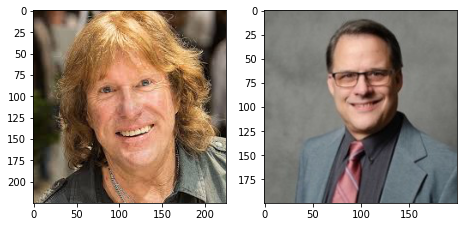

In [10]:
print("Input Images")
images = []
image_names = []
for img_path in glob.glob('input_images/*.jpg'):
    images.append(mpimg.imread(img_path))
    image_names.append(img_path.split("/")[-1])

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    print(image_names[i])
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

In [44]:
%%bash
python generate_images.py --image ./input_images/keith_emerson.jpg --output ./images/dataset/keith_emerson


DEBUG:root:loading example image: ./input_images/keith_emerson.jpg
DEBUG:root:generating images...


### Verify the images are in the dataset

In [12]:
%%bash
tree -d images/dataset 

images/dataset
├── alan_grant
├── claire_dearing
├── ellie_sattler
├── ernest_t_bass
├── ian_malcolm
├── john_hammond
├── owen_grady
└── pat_ryan

8 directories


Output Images


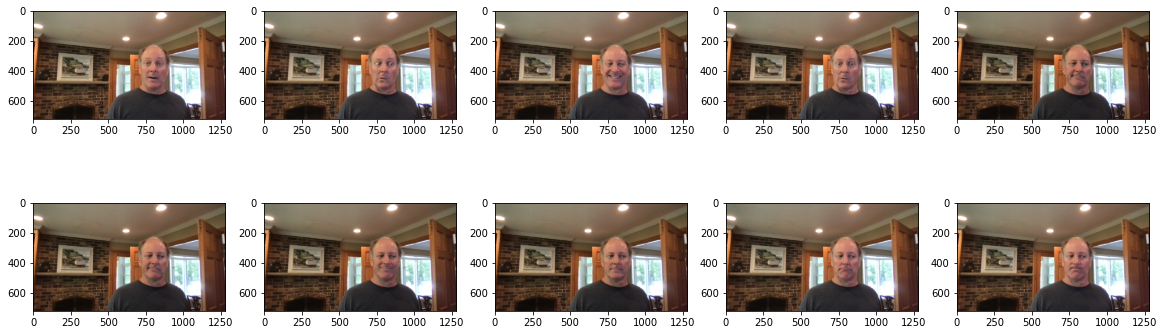

In [16]:
print("Output Images")
images = []
for img_path in glob.glob('images/dataset/ernest_t_bass/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

### Create Facial Encodings

In [17]:
%%bash
# only run this if we need recreate the base encodings
python create_facial_encodings.py -d images/dataset/ernest_t_bass -e encodings/facial_encodings.pkl

[INFO] quantifying faces...
[INFO] processing image [ernest_t_bass] 1/10
[INFO] processing image [ernest_t_bass] 2/10
[INFO] processing image [ernest_t_bass] 3/10
[INFO] processing image [ernest_t_bass] 4/10
[INFO] processing image [ernest_t_bass] 5/10
[INFO] processing image [ernest_t_bass] 6/10
[INFO] processing image [ernest_t_bass] 7/10
[INFO] processing image [ernest_t_bass] 8/10
[INFO] processing image [ernest_t_bass] 9/10
[INFO] processing image [ernest_t_bass] 10/10
Encoding dataset took: 0.06411158243815104 minutes
[INFO] serializing encodings...


### Run Facial Recognition

In [18]:
%%bash
python video_facial_recognition.py -e encodings/facial_encodings.pkl --distance-tolerance 0.5

[INFO] loading encodings...
[INFO] starting video stream...


2021-09-25 11:42:38.994 Python[10351:853680] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)


### Remove named encodings

In [19]:
%%bash
python remove_name_from_encodings.py -n ernest_t_bass

## Closing Thoughts

Facial recognition is the technology Genie that we cannot put back into the bottle.  

While facial recognition at the scale of China will likely use other technologies, todays libraries make it incredibly easy to perform facial recognition.

You may never have to perform facial recognition in your work, but it still is important to understand how this technology can be incorporated into different applications and how easy it is.

### What else can we do with this

Have you ever heard people say, 'oh you look just like your father', or 'I cannot tell you and your sister apart sometimes'

With the information in this notebook, you can find out just how close to, or similar to, another person you really are.


## Sources:

### PyImageSearch
PyImageSearch.com is an amazing resource for Deep Learning and computer vision. Adrian has a tremendous amount of free articles.  I would also encourage you to check out the books he has written.  The books that I have read have been really well done and worth the money.

[PyImageSearch Face Recognition Article](https://www.pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/)

### Machine Learning Is Fun
Adam is the person that created the *face_recognition* library that makes all of this so easy.  His book is also a very good read and covers much more than just computer vision.  A lot of inspiration for this notebook came from his book and articles.

[Machine Learning Is Fun](https://www.machinelearningisfun.com)

### Scikit Image
As usual, the scikit documentation does not disappoint.  This example shows how to display the HOG image
[Scikit Image](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)

### Italojs
Thank you for sharing your github repo with the example code to display the facial landmarks.
[Italojs Github](https://github.com/youngsoul/facial-landmarks-recognition-)



